<a href="https://colab.research.google.com/github/23Tarandeep57/Pytorch_Basics/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Linear Regression

In [ ]:
weight = 0.7
bais = 0.3

start = 0
end= 1
step = 0.02
X = torch.arange(start, end, step)
y = weight * X + bais

X[:10], y[:10]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260]))

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

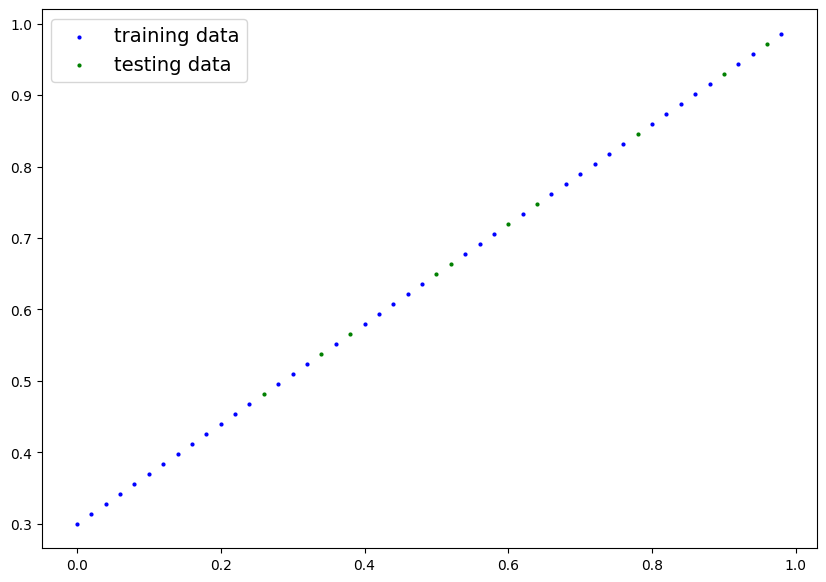

In [ ]:
def plot_predictions(X_train, Y_train, X_test, y_test, pred = False, preds=None):
  plt.figure(figsize=(10,7))
  plt.scatter(X_train, y_train, c = 'b', s = 4, label = 'training data')
  plt.scatter(X_test, y_test, c = 'g', s = 4, label = 'testing data')
  if pred:
    plt.scatter(X_test, preds, c = 'r', s = 4, label = 'predictions')
  plt.legend(prop={"size" : 14})
plot_predictions(X_train, y_train, X_test, y_test)

# Build the model

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(
        1,
        requires_grad = True,
        dtype = torch.float
    ))
    self.bias = nn.Parameter(torch.randn(
        1,
        requires_grad=True,
        dtype = torch.float
    ))

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


### checkout componenets of our model

In [ ]:
#create a random seed
torch.manual_seed(42)

model_0 = LinearRegressionModel()

#checout the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  y_pred = model_0(X_test)
y_pred

tensor([0.2163, 0.3914, 0.3308, 0.4318, 0.2433, 0.4520, 0.3039, 0.2972, 0.3443,
        0.2568])

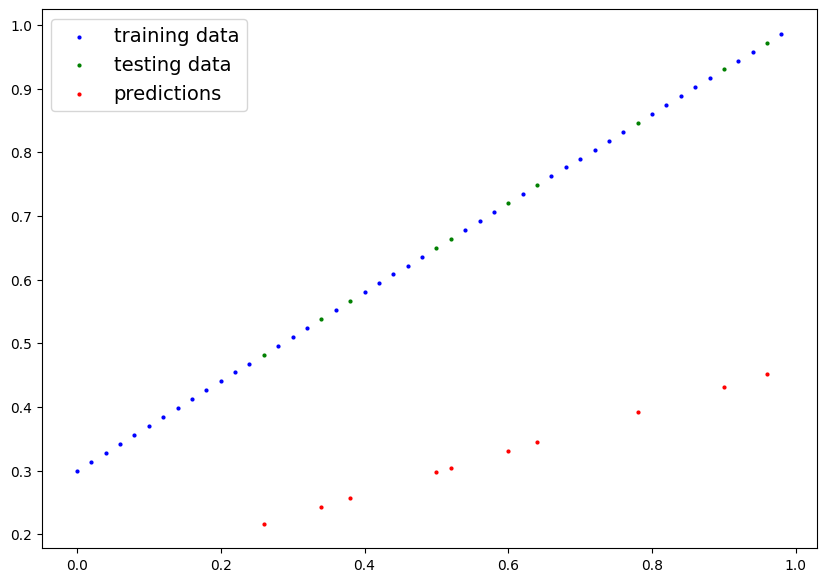

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test, pred= True, preds= y_pred)

In [ ]:
loss_fn = nn.L1Loss()

In [ ]:
loss_fn

L1Loss()

In [ ]:
lr = 1e-3
optimizer = torch.optim.SGD(model_0.parameters(), lr=lr)

In [ ]:
loss_history = []
loss_history_test = []

In [ ]:
epochs = 100

for epoch in range(epochs):
  model_0.train()

#forward pass
  y_pred = model_0(X_train)

  #calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f" Epoch : {epoch} Loss : {loss}")
  loss_history.append(loss.item())
  # opitmizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  #step the optimizer
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    y_hat = model_0(X_test)
    test_loss = loss_fn(y_hat, y_test)
    print(f" Epoch : {epoch} Test_Loss : {test_loss}")
    loss_history_test.append(test_loss.item())


  print(model_0.state_dict())


 Epoch : 0 Loss : 0.340311199426651
 Epoch : 0 Test_Loss : 0.3835429251194
OrderedDict({'weights': tensor([0.3372]), 'bias': tensor([0.1298])})
 Epoch : 1 Loss : 0.33909451961517334
 Epoch : 1 Test_Loss : 0.3822692036628723
OrderedDict({'weights': tensor([0.3376]), 'bias': tensor([0.1308])})
 Epoch : 2 Loss : 0.3378778398036957
 Epoch : 2 Test_Loss : 0.3809954524040222
OrderedDict({'weights': tensor([0.3381]), 'bias': tensor([0.1318])})
 Epoch : 3 Loss : 0.336661159992218
 Epoch : 3 Test_Loss : 0.3797217905521393
OrderedDict({'weights': tensor([0.3386]), 'bias': tensor([0.1328])})
 Epoch : 4 Loss : 0.33544445037841797
 Epoch : 4 Test_Loss : 0.3784480094909668
OrderedDict({'weights': tensor([0.3390]), 'bias': tensor([0.1338])})
 Epoch : 5 Loss : 0.33422771096229553
 Epoch : 5 Test_Loss : 0.3771743178367615
OrderedDict({'weights': tensor([0.3395]), 'bias': tensor([0.1348])})
 Epoch : 6 Loss : 0.3330110013484955
 Epoch : 6 Test_Loss : 0.3759005665779114
OrderedDict({'weights': tensor([0.3

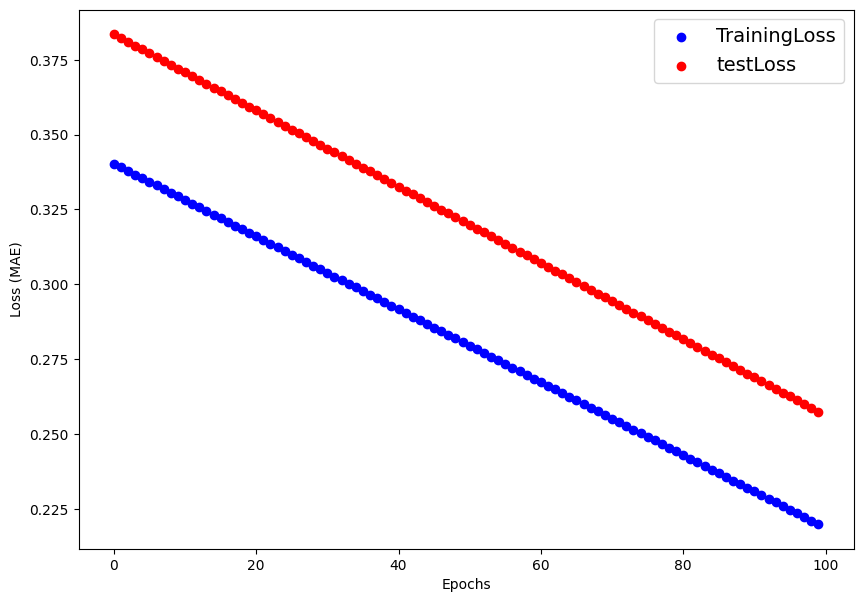

In [ ]:
def plot_loss(loss_history, loss_history_test):
  plt.figure(figsize=(10,7))
  plt.scatter([range(len(loss_history))], loss_history, c = 'b', label='TrainingLoss')
  plt.scatter([range(len(loss_history))], loss_history_test, c='red', label='testLoss')
  plt.legend(prop={'size':14})
  plt.ylabel("Loss (MAE)")
  plt.xlabel("Epochs")
  plt.show()

plot_loss(loss_history, loss_history_test)

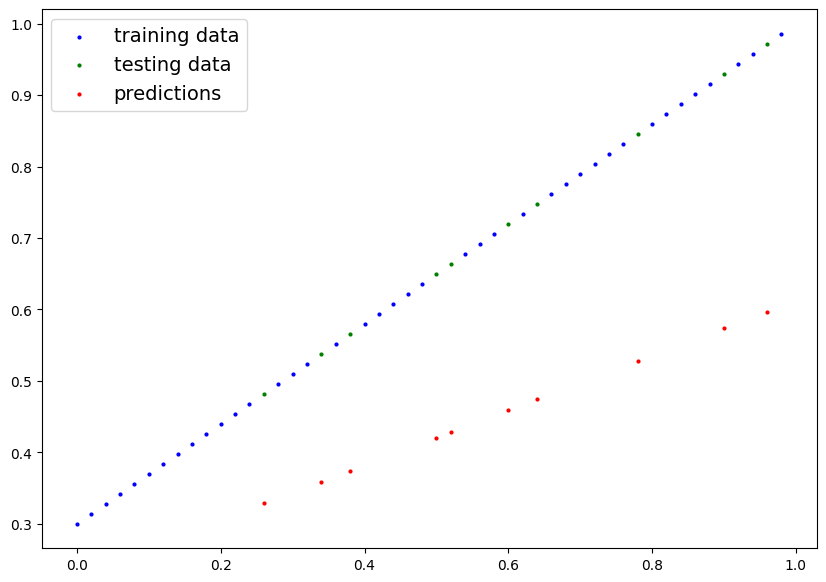

In [ ]:
with torch.inference_mode():
  y_pred = model_0(X_test).numpy()

plot_predictions(X_train, y_train, X_test, y_test, pred= True, preds= y_pred)

In [ ]:
from pathlib import Path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir( parents=True, exist_ok = True)

MODEL_NAME = 'pytorch_model_0.pth'
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to : models/pytorch_model_0.pth


In [ ]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [ ]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=False))

<All keys matched successfully>

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([0.3285, 0.5277, 0.4588, 0.5737, 0.3591, 0.5967, 0.4281, 0.4204, 0.4741,
        0.3744])

In [ ]:
y_preds == loaded_model_preds

tensor([True, True, True, True, True, True, True, True, True, True])